In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

#recentDate = engine.execute('SELECT * FROM measurement ORDER BY date DESC').first()
#recentDate.date

first_row = session.query(Measurement).order_by(Measurement.date.desc()).first()
first_row.date

'2017-08-23'

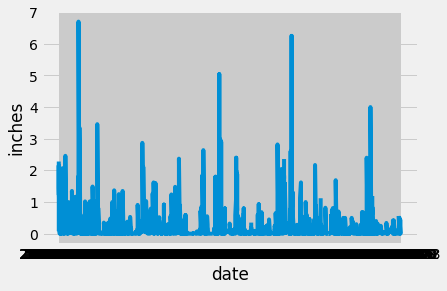

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

measurement_df = pd.DataFrame()

# Perform a query to retrieve the data and precipitation scores

#x = engine.execute('SELECT date,prcp FROM measurement WHERE date > "2016-08-23"').fetchall()
x = session.query(Measurement).\
    filter(Measurement.date > "2016-08-23").\
    order_by(Measurement.date).all()
y = []
z = []
for rows in x:
    #print(rows.date,rows.prcp)
    y.append(rows.date)
    z.append(rows.prcp)
measurement_df["date"] = y
measurement_df["prcp"] = z  
# Save the query results as a Pandas DataFrame and set the index to the date column

#measurement_df = pd.DataFrame(columns = {"prcp","date"},data = x)
measurementDatePrcp = measurement_df.set_index('date')

# Sort the dataframe by date

measurementDatePrcp.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(measurementDatePrcp)
plt.xlabel("date")
plt.ylabel("inches")
plt.show()
measurementDatePrcp

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

mean_numpy = np.mean(measurementDatePrcp)
print(f"mean:{mean_numpy}")

var_numpy = np.var(measurementDatePrcp,ddof = 0)
print(f"var:{var_numpy}")

sd_numpy = np.std(measurementDatePrcp,ddof = 0)
print(f"sd:{sd_numpy}")

mean:prcp    0.176462
dtype: float64
var:prcp    0.21176
dtype: float64
sd:prcp    0.460174
dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0

x = session.query(Measurement).all()
y = session.query(Station).all()
z = []

stationCounts_df = pd.DataFrame()

counts = []

for rows in y:
    z.append(rows.station)
for rows in x:
    if rows.station == z[0]:
        count1 = count1 + 1
    if rows.station == z[1]:
        count2 = count2 + 1
    if rows.station == z[2]:
        count3 = count3 + 1
    if rows.station == z[3]:
        count4 = count4 + 1
    if rows.station == z[4]:
        count5 = count5 + 1
    if rows.station == z[5]:
        count6 = count6 + 1
    if rows.station == z[6]:
        count7 = count7 + 1
    if rows.station == z[7]:
        count8 = count8 + 1
    if rows.station == z[8]:
        count9 = count9 + 1    
        
counts.append(count1)  
counts.append(count2)
counts.append(count3)
counts.append(count4)
counts.append(count5)
counts.append(count6)
counts.append(count7)
counts.append(count8)
counts.append(count9)

stationCounts_df["stations"] = z
stationCounts_df["count"] = counts

stationCounts_df.sort_values("count",ascending = False)

,stations,count
6,USC00519281,2772
0,USC00519397,2724
1,USC00513117,2709
5,USC00519523,2669
8,USC00516128,2612
2,USC00514830,2202
7,USC00511918,1979
3,USC00517948,1372
4,USC00518838,511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tempBreakdown = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
tempBreakdown

[(54.0, 85.0, 71.66378066378067)]

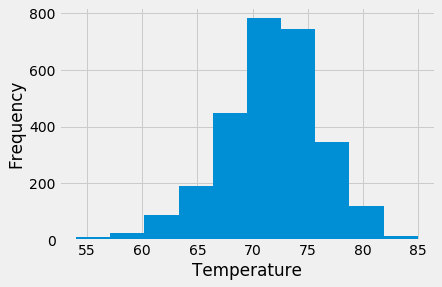

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
popTemp = session.query(Measurement).\
    filter(Measurement.station == 'USC00519281').all()
temps = []
for values in popTemp:
    temps.append(values.tobs)
plt.hist(temps)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [32]:
# Close Session
session.close()